# Assignment - 4

### Customer Segmentation Analysis

### Problem Statement
### You own the mall and want to understand the customers who can quickly converge [Target Customers] so that the insight can be given to the marketing team and plan the strategy accordingly

### Dataset Downloaded:

### Load the dataset into the tool.

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Perform Below Visualizations.

#### i) Univariate Analysis

##### Histogram

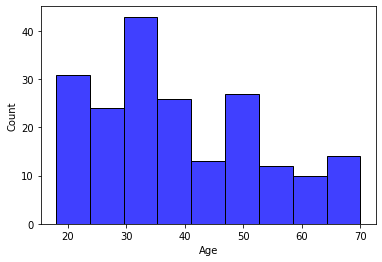

In [4]:
sns.histplot(df["Age"], color='blue')

##### Countplot

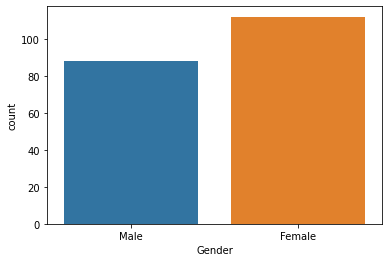

In [5]:
sns.countplot(x=df['Gender']) 

##### Box Plot

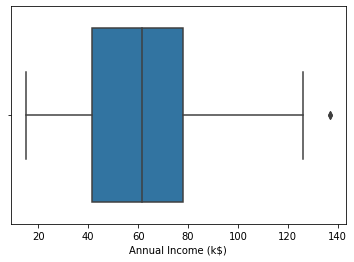

In [6]:
sns.boxplot(x=df["Annual Income (k$)"]) 

#### ii)Bi - Variate Analysis

##### LinearPlot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


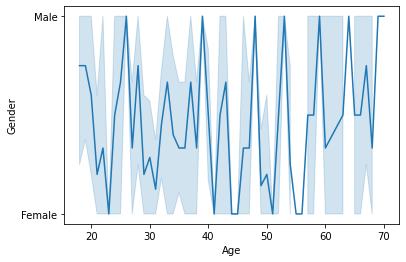

In [7]:
sns.lineplot(df["Age"],df["Gender"])

##### Scatter Plot

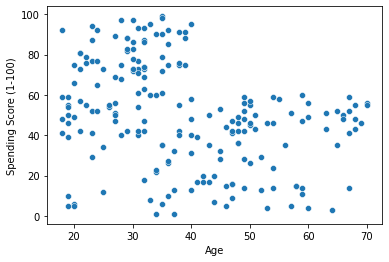

In [8]:
sns.scatterplot(x=df['Age'],y=df['Spending Score (1-100)'])

##### Pointplot

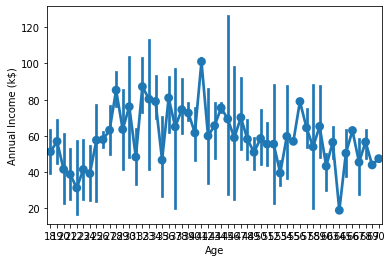

In [9]:
sns.pointplot(x='Age',y='Annual Income (k$)',data=df)

##### iii) Multi-Variate Analysis

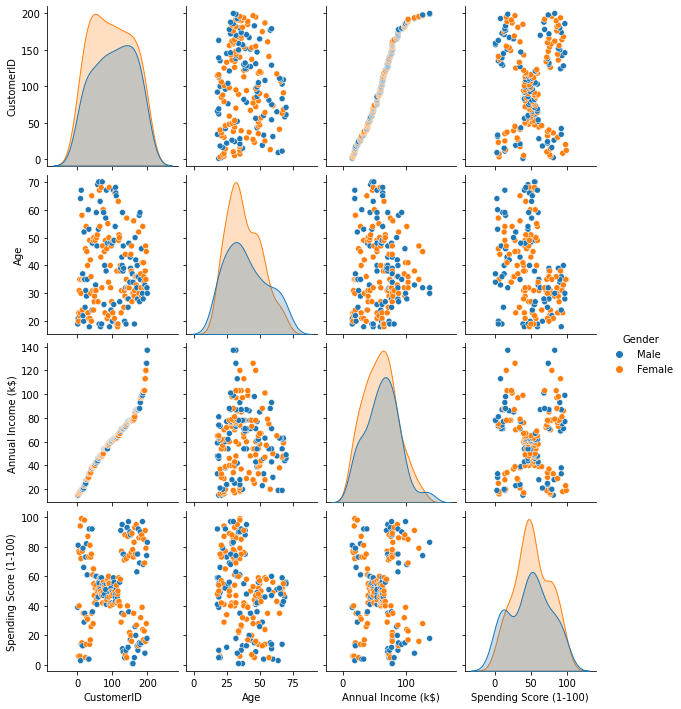

In [10]:
sns.pairplot(
    data=df, 
    aspect=.85,
    hue='Gender');

### Perform descriptive statistics on the dataset.

In [11]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
df.shape

(200, 5)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [15]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [16]:
df.mode()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,32.0,54.0,42.0
1,2,NaN,NaN,78.0,NaN
2,3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
195,196,NaN,NaN,NaN,NaN
196,197,NaN,NaN,NaN,NaN
197,198,NaN,NaN,NaN,NaN
198,199,NaN,NaN,NaN,NaN


### Check for Missing values and deal with them.

In [17]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Find the outliers and replace them outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


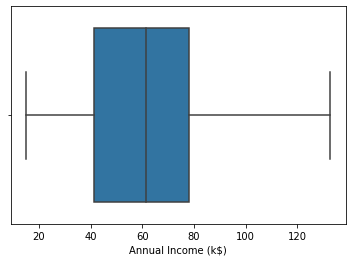

In [84]:
sns.boxplot(df['Annual Income (k$)'],data=df)

In [19]:
df['Annual Income (k$)'].skew()

0.3218425498619055

In [20]:
quartile1=df['Annual Income (k$)'].quantile(0.25)
quartile2=df['Annual Income (k$)'].quantile(0.75)
Interquartile_range=quartile2-quartile1
whisker_width = 1.5
lower_whisker = quartile1 -(whisker_width*Interquartile_range)
upper_whisker = quartile2 + (whisker_width*Interquartile_range)
df['Annual Income (k$)']=np.where((df['Annual Income (k$)'])>upper_whisker,upper_whisker,np.where(df['Annual Income (k$)']<lower_whisker,lower_whisker,df['Annual Income (k$)']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


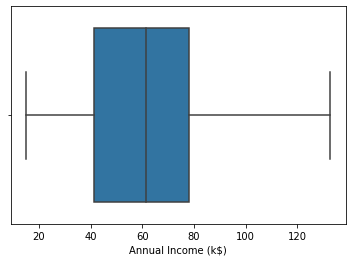

In [21]:
sns.boxplot(df['Annual Income (k$)'],data=df)

### Check for Categorical columns and perform encoding.

In [54]:

numeric_data = df.select_dtypes(include = [np.number]) 
categorical_data = df.select_dtypes(exclude = [np.number]) 

print("The number of numerical variables: ", numeric_data.shape[1]) 
print("The number of categorical variables: ", categorical_data.shape[1])

The number of numerical variables:  4
The number of categorical variables:  1


In [55]:
print("The number of categorical variables: ", categorical_data.shape[1]) 

Categorical_variables = list(categorical_data.columns)
Categorical_variables

The number of categorical variables:  1


['Gender']

In [57]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['Gender'])
df["Gender"] = label

In [60]:
df['Gender'].value_counts()

0    112
1     88
Name: Gender, dtype: int64

### Scaling the data

In [62]:
X = df.drop("Age", axis=1)
Y = df['Age']

In [74]:
from sklearn.preprocessing import StandardScaler
object= StandardScaler()
scale = object.fit_transform(X) 
print(scale)

[[-1.7234121   1.12815215 -1.74542941 -0.43480148]
 [-1.70609137  1.12815215 -1.74542941  1.19570407]
 [-1.68877065 -0.88640526 -1.70708307 -1.71591298]
 [-1.67144992 -0.88640526 -1.70708307  1.04041783]
 [-1.6541292  -0.88640526 -1.66873673 -0.39597992]
 [-1.63680847 -0.88640526 -1.66873673  1.00159627]
 [-1.61948775 -0.88640526 -1.6303904  -1.71591298]
 [-1.60216702 -0.88640526 -1.6303904   1.70038436]
 [-1.5848463   1.12815215 -1.59204406 -1.83237767]
 [-1.56752558 -0.88640526 -1.59204406  0.84631002]
 [-1.55020485  1.12815215 -1.59204406 -1.4053405 ]
 [-1.53288413 -0.88640526 -1.59204406  1.89449216]
 [-1.5155634  -0.88640526 -1.55369772 -1.36651894]
 [-1.49824268 -0.88640526 -1.55369772  1.04041783]
 [-1.48092195  1.12815215 -1.55369772 -1.44416206]
 [-1.46360123  1.12815215 -1.55369772  1.11806095]
 [-1.4462805  -0.88640526 -1.51535138 -0.59008772]
 [-1.42895978  1.12815215 -1.51535138  0.61338066]
 [-1.41163905  1.12815215 -1.43865871 -0.82301709]
 [-1.39431833 -0.88640526 -1.43

In [75]:
X_scaled  = pd.DataFrame(scale, columns = X.columns)
X_scaled

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
0,-1.723412,1.128152,-1.745429,-0.434801
1,-1.706091,1.128152,-1.745429,1.195704
2,-1.688771,-0.886405,-1.707083,-1.715913
3,-1.671450,-0.886405,-1.707083,1.040418
4,-1.654129,-0.886405,-1.668737,-0.395980
...,...,...,...,...
195,1.654129,-0.886405,2.280936,1.118061
196,1.671450,-0.886405,2.511014,-0.861839
197,1.688771,1.128152,2.511014,0.923953
198,1.706091,1.128152,2.769852,-1.250054


### Split the data into dependent and independent **variables**.


In [68]:
X_Var = df.iloc[:, :-1].values

In [69]:
X_Var

array([[  1.  ,   1.  ,  19.  ,  15.  ],
       [  2.  ,   1.  ,  21.  ,  15.  ],
       [  3.  ,   0.  ,  20.  ,  16.  ],
       [  4.  ,   0.  ,  23.  ,  16.  ],
       [  5.  ,   0.  ,  31.  ,  17.  ],
       [  6.  ,   0.  ,  22.  ,  17.  ],
       [  7.  ,   0.  ,  35.  ,  18.  ],
       [  8.  ,   0.  ,  23.  ,  18.  ],
       [  9.  ,   1.  ,  64.  ,  19.  ],
       [ 10.  ,   0.  ,  30.  ,  19.  ],
       [ 11.  ,   1.  ,  67.  ,  19.  ],
       [ 12.  ,   0.  ,  35.  ,  19.  ],
       [ 13.  ,   0.  ,  58.  ,  20.  ],
       [ 14.  ,   0.  ,  24.  ,  20.  ],
       [ 15.  ,   1.  ,  37.  ,  20.  ],
       [ 16.  ,   1.  ,  22.  ,  20.  ],
       [ 17.  ,   0.  ,  35.  ,  21.  ],
       [ 18.  ,   1.  ,  20.  ,  21.  ],
       [ 19.  ,   1.  ,  52.  ,  23.  ],
       [ 20.  ,   0.  ,  35.  ,  23.  ],
       [ 21.  ,   1.  ,  35.  ,  24.  ],
       [ 22.  ,   1.  ,  25.  ,  24.  ],
       [ 23.  ,   0.  ,  46.  ,  25.  ],
       [ 24.  ,   1.  ,  31.  ,  25.  ],
       [ 25.  , 

In [70]:
Y_Var = df.iloc[:, -1].values

In [71]:
Y_Var

array([39, 81,  6, 77, 40, 76,  6, 94,  3, 72, 14, 99, 15, 77, 13, 79, 35,
       66, 29, 98, 35, 73,  5, 73, 14, 82, 32, 61, 31, 87,  4, 73,  4, 92,
       14, 81, 17, 73, 26, 75, 35, 92, 36, 61, 28, 65, 55, 47, 42, 42, 52,
       60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55, 52, 59, 51, 59, 50, 48,
       59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52, 42, 51, 55, 41, 44, 57,
       46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52, 47, 50, 42, 49, 41, 48,
       59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42, 46, 48, 50, 43, 59, 43,
       57, 56, 40, 58, 91, 29, 77, 35, 95, 11, 75,  9, 75, 34, 71,  5, 88,
        7, 73, 10, 72,  5, 93, 40, 87, 12, 97, 36, 74, 22, 90, 17, 88, 20,
       76, 16, 89,  1, 78,  1, 73, 35, 83,  5, 93, 26, 75, 20, 95, 27, 63,
       13, 75, 10, 92, 13, 86, 15, 69, 14, 90, 32, 86, 15, 88, 39, 97, 24,
       68, 17, 85, 23, 69,  8, 91, 16, 79, 28, 74, 18, 83])

### Split the data into training and testing



In [72]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size  =0.20, random_state = 0)

In [79]:
X_train.shape


(160, 4)

In [80]:
X_test.shape


(40, 4)

In [81]:
Y_train.shape


(160,)

In [82]:
Y_test.shape

(40,)

### Clustering Algorithmn

In [28]:
x = df.iloc[:, [3, 4]].values 


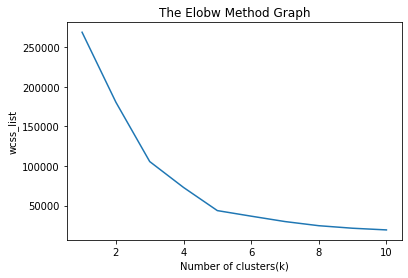

In [64]:
from sklearn.cluster import KMeans  
wcss_list= []   
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [65]:
kmeans = KMeans(n_clusters=5, init = 'k-means++', random_state = 42)  
y_predict = kmeans.fit_predict(x)


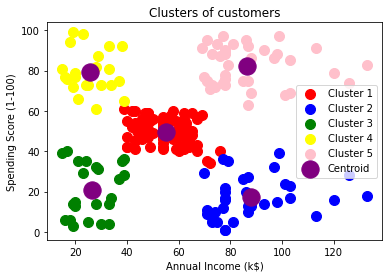

In [66]:
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'red', label = 'Cluster 1')   
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'green', label = 'Cluster 3')  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4') 
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'pink', label = 'Cluster 5')  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'purple', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()